# Predicting sed_basin using ML

for NSF Bedclasses


In [1]:
import os
import sys
import numpy as np
# import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
# import cmocean
import xarray as xr
import seaborn as sns

def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
from matplotlib import rc,rcParams

# rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


## Read in sampled line (from Borthwick)

In [5]:
# Determine where to look #
# basedir = 'data'
basedir = '/Users/dporter/Documents/Research/Projects/bedclass/'



In [116]:
datadir = 'data'
# suffix = '.out'
# atm_suffix = '.dat'
infile = os.path.join(basedir, datadir, 'upper_thwaites_model_sed_sampled.csv')
df = pd.read_csv(infile)
df

,OBJECTID,freeair_grav,flight_elev,PSX,PSY,sed_basin,classvalue,water,mag,reflectivity,swathradar,roughness,bedmachine,beta,boug
0,1,-23.9,1612.41,-1364786.37,-459059.05,0.0,0,0.003356,-26.531353,None,None,328.596680,-1230.801270,9.728771,25.469545
1,2,-23.78,1615.33,-1365245.70,-459206.70,0.0,0,0.003045,-23.660578,None,None,430.959198,-1226.179688,9.733963,25.681009
2,3,-23.73,1617.36,-1365768.83,-459374.38,0.0,0,0.001919,-21.614716,None,None,492.869568,-1230.083862,9.739579,25.690121
3,4,-23.76,1618.09,-1366225.41,-459519.14,0.0,0,0.004612,-20.870977,None,None,477.412079,-1238.437744,9.744205,25.699177
4,5,-23.82,1618.10,-1366681.29,-459661.62,0.0,0,0.013524,-21.147133,None,None,297.176849,-1251.455200,9.748562,25.709042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,456,-25.96,1835.63,-1241152.49,-438504.10,1.0,1,0.000000,86.761391,None,None,153.182358,-1369.962158,10.141876,22.451939
456,457,-26.51,1835.37,-1241687.53,-438534.21,1.0,1,0.000000,75.139977,None,None,164.807800,-1371.256348,10.122437,22.205278
457,458,-26.99,1835.20,-1242155.35,-438559.96,1.0,1,0.000000,64.975822,None,None,175.672501,-1370.955078,10.105682,21.989605
458,459,-27.43,1835.21,-1242622.77,-438585.38,1.0,1,0.000000,54.757145,None,None,187.959457,-1369.822388,10.097807,21.774118


In [117]:
df.dtypes

OBJECTID          int64
freeair_grav     object
flight_elev     float64
PSX             float64
PSY             float64
sed_basin        object
classvalue       object
water           float64
mag             float64
reflectivity     object
swathradar       object
roughness       float64
bedmachine      float64
beta            float64
boug            float64
dtype: object

### Data OoO

<AxesSubplot:>

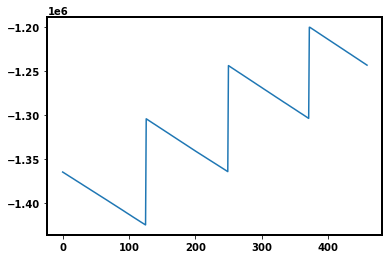

In [118]:
df.PSX.plot()

# df[df['PSX'].isnull()]
# df['PSX'].interpolate(method='polynomial', order=2)

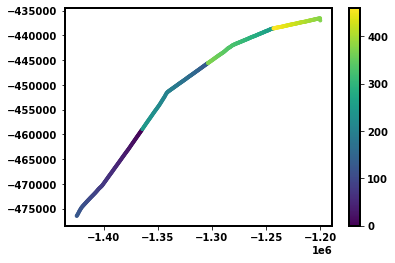

In [119]:
plt.scatter(df.PSX, df.PSY, c=df.OBJECTID, marker='.')
plt.colorbar()



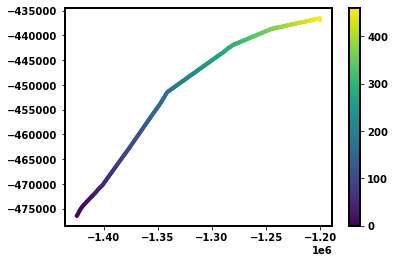

In [121]:
# plt.plot(df.sort_values(by=['PSX'], ascending=True).PSX, ls='', marker='.')

df = df.sort_values(by=['PSX'], ascending=True).reset_index()
plt.scatter(df.PSX, df.PSY, c=df.index, marker='.')
# plt.scatter(df.sort_values(by=['PSX'], ascending=True).PSX, df.sort_values(by=['PSX'], ascending=True).PSY, c=df.OBJECTID, marker='.')
plt.colorbar()

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

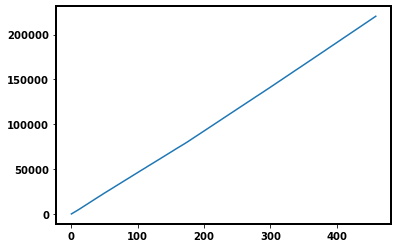

In [122]:
# df_borthwick['Dist'] = 0
# for i in range(1, len(df_borthwick)-1):
# #     dfmax.remove(columnsn='Dist')
# #     print('{}, {}'.format(dfmax['LAT'].iloc[i-1], dfmax['LON'].iloc[i-1]))
# #     print('{}, {}'.format(dfmax['LAT'].iloc[i], dfmax['LON'].iloc[i]))
#     df_borthwick['Dist'].iloc[i] = get_distance_haversine((df_borthwick['LAT'].iloc[i-1],df_ross_max['LON'].iloc[i-1]),
#                                                   (df_borthwick['LAT'].iloc[i],df_ross_max['LON'].iloc[i]))
# #     print('Dist: {}'.format(dfmax['Dist'].iloc[i]))


df['Dist'] = 0
for i in range(1, len(df)-1):
#     dfmax.remove(columnsn='Dist')
#     print('{}, {}'.format(dfmax['LAT'].iloc[i-1], dfmax['LON'].iloc[i-1]))
#     print('{}, {}'.format(dfmax['LAT'].iloc[i], dfmax['LON'].iloc[i]))
    df['Dist'].iloc[i] = df['Dist'].iloc[i-1] + np.sqrt((df['PSX'].iloc[i-1] - df['PSX'].iloc[i])**2 - \
                                                  (df['PSY'].iloc[i-1] - df['PSY'].iloc[i])**2)
    
    # print(df['PSX'].iloc[i-1] - df['PSX'].iloc[i])
    # print(df['PSY'].iloc[i-1] - df['PSY'].iloc[i])
    # print('{} Dist: {}'.format(i, df['Dist'].iloc[i]))
    
# df['Dist'][df['Dist'] > 2*df['Dist'].mean()] = df['Dist'].mean()
df['Dist'].iloc[0] = 0
df['Dist'].iloc[-1] = df['Dist'].iloc[-2] + df['Dist'].iloc[:-2].diff().mean()
df['Dist'].plot()

## Plot samples UTG line

In [123]:
# df.dtypes
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

### Find basin edges

In [125]:
df['classvalue'].iloc[0] = df['classvalue'].iloc[1]
df['sed_basin'].iloc[0] = df['sed_basin'].iloc[1]

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [131]:
print(df[df['classvalue'].diff() != 0].index.tolist())
print(df['Dist'].iloc[df[df['classvalue'].diff() != 0].index.tolist()]/1e3)


# df.iloc[df[df['classvalue'].diff() != 0].index.tolist()]

[0, 46, 72, 157, 204, 266, 299, 325, 339, 364, 385]
0        0.000000
46      21.413280
72      33.370376
157     72.159683
204     94.453439
266    124.739793
299    140.824663
325    153.704049
339    160.656703
364    173.037721
385    183.531670
Name: Dist, dtype: float64


In [132]:
def add_basin_locs():
    ax.axvspan(21.4, 33.3, alpha=0.5, color='goldenrod')
    ax.axvspan(72.15, 94.45, alpha=0.5, color='goldenrod')
    ax.axvspan(124.73, 140.82, alpha=0.5, color='goldenrod')
    ax.axvspan(153.70, 160.65, alpha=0.5, color='goldenrod')
    ax.axvspan(173.03, 183.53, alpha=0.5, color='goldenrod')

### Plot profiles

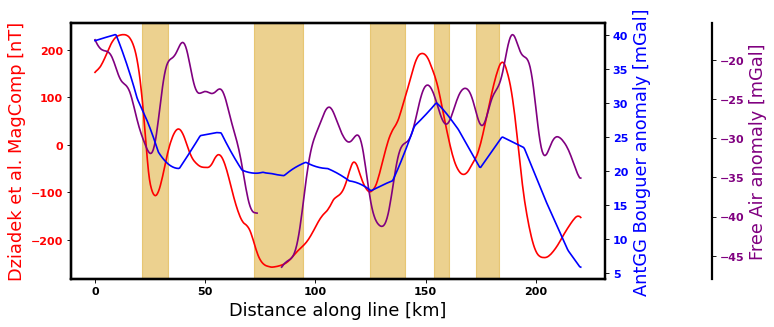

In [174]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(df['Dist']/1e3, df['mag'], color='red')
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('Dziadek et al. MagComp [nT]', color='red', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
# plt.axvline(x=27, color="goldenrod", linestyle="--")
add_basin_locs()

ax2 = ax.twinx()
ax2.plot(df['Dist']/1e3, df['freeair_grav'], color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylabel('Free Air anomaly [mGal]', color='purple', fontsize=16)
ax2.spines['right'].set_position(('axes', 1.2))

ax3 = ax.twinx()
ax3.plot(df['Dist']/1e3, df['boug'], color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_ylabel('AntGG Bouguer anomaly [mGal]', color='blue', fontsize=16)


plt.tight_layout()
plt.savefig('figs/lineplot_UTG_sample_potfields.png')

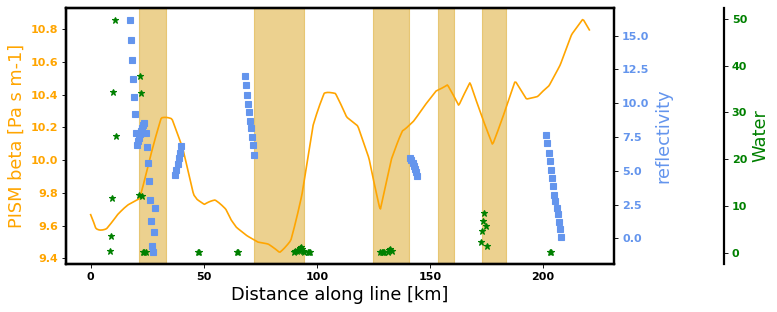

In [175]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)


ax.plot(df['Dist']/1e3, df['beta'], color='orange')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_ylabel('PISM beta [Pa s m-1]', color='orange', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
add_basin_locs()



ax3 = ax.twinx()
ax3.plot(df['Dist']/1e3, df['reflectivity'], color='cornflowerblue', ls='', marker='s')
ax3.tick_params(axis='y', labelcolor='cornflowerblue')
ax3.set_ylabel('reflectivity', color='cornflowerblue', fontsize=16)

ax4 = ax.twinx()
ax4.plot(df['Dist'].loc[df['water'] >= 0.1]/1e3, df['water'].loc[df['water'] >= 0.1], color='green', ls='', marker='*')
ax4.tick_params(axis='y', labelcolor='green')
ax4.set_ylabel('Water', color='green', fontsize=16)
ax4.spines['right'].set_position(('axes', 1.2))


plt.tight_layout()
plt.savefig('figs/lineplot_UTG_sample_ClassBeta.png')

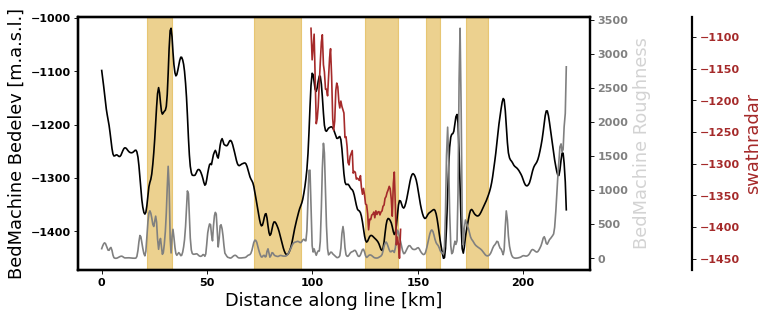

In [176]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(df['Dist']/1e3, df['bedmachine'], color='black')
ax.tick_params(axis='y', labelcolor='black')
ax.set_ylabel('BedMachine Bedelev [m.a.s.l.]', color='black', fontsize=16)
ax.set_xlabel('Distance along line [km]', color='black', fontsize=16)
add_basin_locs()

ax2 = ax.twinx()
ax2.plot(df['Dist']/1e3, df['roughness'], 
         color='grey')
ax2.tick_params(axis='y', labelcolor='grey')
ax2.set_ylabel('BedMachine Roughness', color='lightgrey', fontsize=16)

ax3 = ax.twinx()
ax3.plot(df['Dist']/1e3, df['swathradar'], 
         color='brown')
ax3.tick_params(axis='y', labelcolor='brown')
ax3.set_ylabel('swathradar', color='brown', fontsize=16)
ax3.spines['right'].set_position(('axes', 1.2))

plt.tight_layout()
plt.savefig('figs/lineplot_borthwickmuto_sample_BedMachine.pdf')

<AxesSubplot:>

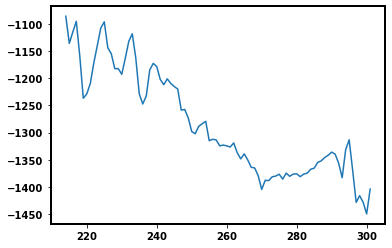

In [160]:
df['swathradar'].plot()
# df['classvalue'].plot()

# Tensor Flow 

(for another time)

In [186]:
# from tensorflow import keras


# Scikit-learn

## Prepare data set

In [207]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# #split dataset in features and target variable
# feature_cols = ['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness','classvalue']
# X = df[feature_cols] # Features
# y = df['classvalue'] # Target variable

In [437]:
df_train = df[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness','classvalue']]
df_train['classvalue'] = df_train['classvalue'].astype('int')

/var/folders/4b/tlrtp4_x48bdc8tdw206wqzr0000gn/T/ipykernel_98441/3421627128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['classvalue'] = df_train['classvalue'].astype('int')


### scale

In [438]:
sc = StandardScaler()

df_scaled = df_train.copy()
df_scaled[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']] = sc.fit_transform(df_train[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']])

# temp = sc.fit_transform(df_train)
# df_scaled = pd.DataFrame(temp, index=df_train.index, columns=df_train.columns)

### split

In [439]:
#Splitting the dataset into  training and validation sets
training_set, validation_set = train_test_split(df_scaled, test_size = 0.2, random_state = 21)

In [440]:
#classifying the predictors and target variables as X and Y
# X_train = training_set.iloc[:,0:-1].values
# Y_train = training_set.iloc[:,-1].values
# X_val = validation_set.iloc[:,0:-1].values
# y_val = validation_set.iloc[:,-1].values

X_train = training_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
y_train = training_set['classvalue'].values
X_test = validation_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
y_test = validation_set['classvalue'].values

## Yellowbrick for visualization

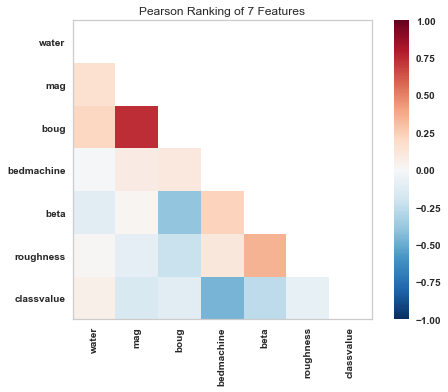

<AxesSubplot:title={'center':'Pearson Ranking of 7 Features'}>

In [446]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df_scaled)  # training_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
visualizer.show()

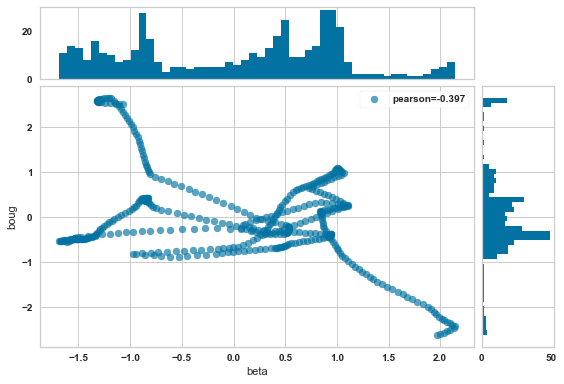

<AxesSubplot:xlabel='beta', ylabel='boug'>

In [419]:
from yellowbrick.features import JointPlotVisualizer


visualizer = JointPlotVisualizer(columns=['beta', 'boug'])
visualizer.fit_transform(df_train, df_train['classvalue'].values)
visualizer.show()

In [420]:
X = df_scaled[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
y = df_scaled['classvalue'].astype('int').values

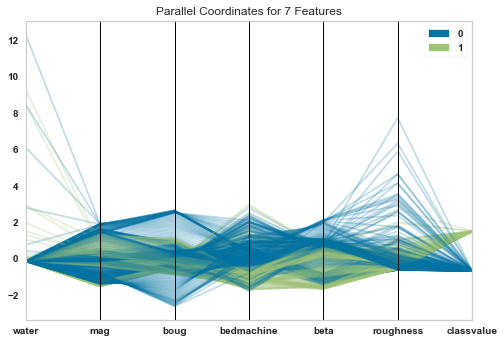

In [421]:
from yellowbrick.features import parallel_coordinates

visualizer = parallel_coordinates(df_scaled, y, normalize="standard")

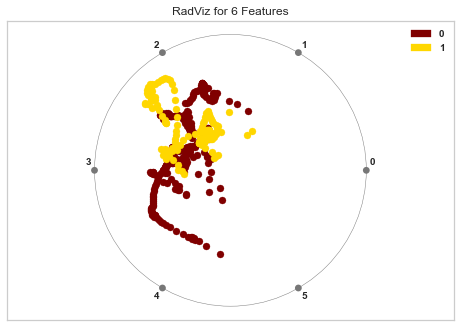

In [422]:
from yellowbrick.features import radviz

visualizer = radviz(X, y, colors=["maroon", "gold"])

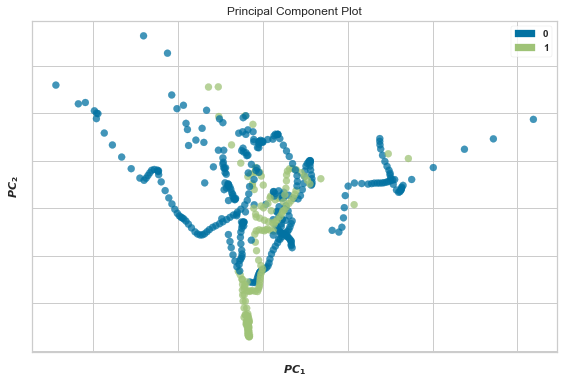

In [423]:
from yellowbrick.features import pca_decomposition

visualizer = pca_decomposition(X, y)

## GaussianNB

In [442]:
# #Initializing the MLPClassifier
# classifier = MLPClassifier(hidden_layer_sizes=(), alpha = 0,  # =(150,100,50) 
#                            max_iter=300, 
#                            activation = 'relu', 
#                            solver='lbfgs',  # 'lbfgs' 'adam'
#                            random_state=1)

classifier = GaussianNB()

### fit to training data

In [443]:
#Fitting the training data to the network
classifier.fit(X_train, y_train)

GaussianNB()

### predict y_pred for X_test input

In [444]:
#Predicting y for X_val
y_pred = classifier.predict(X_test)

### Calculating the accuracy of predictions

In [441]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [445]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print(f"Accuracy of MLPClassifier : {accuracy(cm)}")

Accuracy of MLPClassifier : 0.7282608695652174


## Classification Report

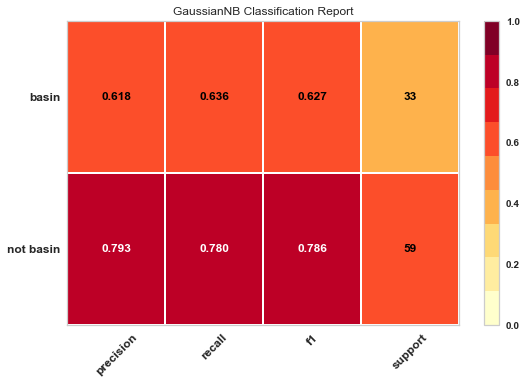

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [424]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
# model = GaussianNB()
visualizer = ClassificationReport(classifier, 
                                  classes=["not basin", "basin"], 
                                  support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [425]:
# visualizer = Rank2D(
#     features=features, algorithm='covariance'
# )
# visualizer.fit(X, y)                # Fit the data to the visualizer
# visualizer.transform(X)             # Transform the data
# visualizer.show()                   # Finalize and render the figure

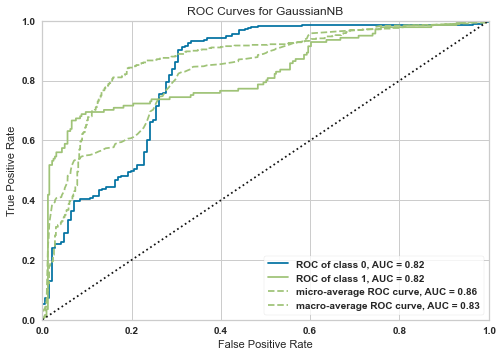

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [426]:
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ROCAUC

# model = LinearSVC()
# visualizer = ROCAUC(model, iterations=500, binary=True)

visualizer = ROCAUC(classifier)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()


## `MLPClassifier` example from scikitlearn docs

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9456521739130435


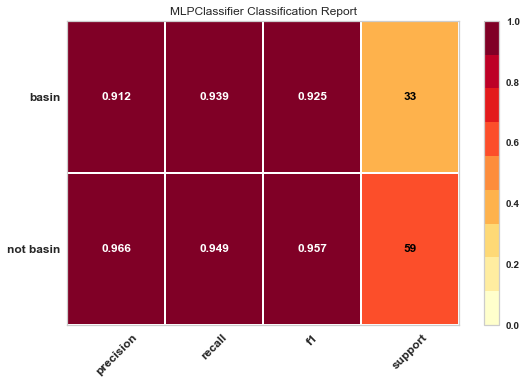

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [427]:
# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
#                                                     random_state=1)

clf = MLPClassifier(random_state=1, 
                    max_iter=500)
clf.fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
print(clf.score(X_test, y_test))

visualizer = ClassificationReport(clf, 
                                  classes=["not basin", "basin"], 
                                  support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

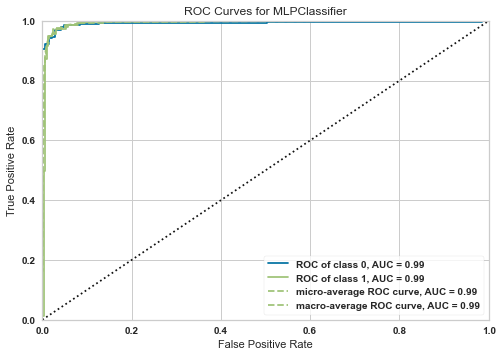

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [428]:
visualizer = ROCAUC(clf)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()

## Perceptron

In [429]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

coeffs = clf.coef_

for cid, c in enumerate(df_train[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].columns):
    print(f"{c:12}: {coeffs[0, cid]:5.2f}")

water       : -4.21
mag         :  0.74
boug        :  0.18
bedmachine  : -3.90
beta        : -0.41
roughness   :  0.98


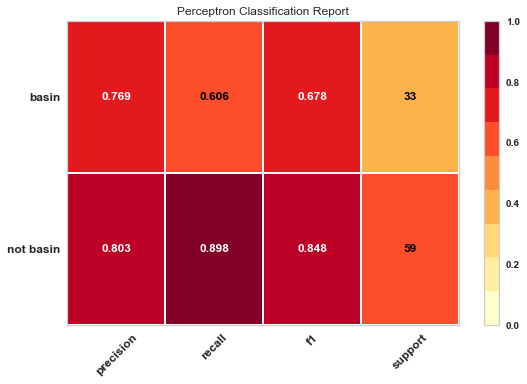

<AxesSubplot:title={'center':'Perceptron Classification Report'}>

In [430]:
visualizer = ClassificationReport(clf, 
                                  classes=["not basin", "basin"], 
                                  support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

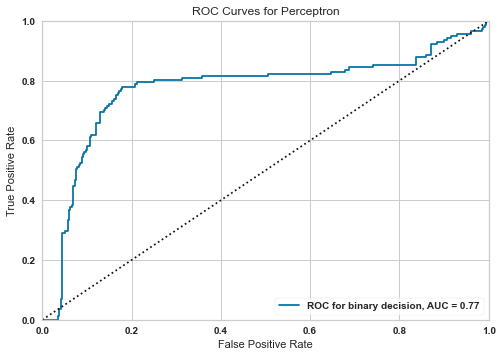

<AxesSubplot:title={'center':'ROC Curves for Perceptron'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [431]:
visualizer = ROCAUC(clf, binary=True)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()

## Logistic Regression

### NOT scaling

In [432]:
#Splitting the dataset into  training and validation sets
training_set, validation_set = train_test_split(df_train, test_size = 0.5, random_state = 21)

X_train = training_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
y_train = training_set['classvalue'].values
X_test = validation_set[['water', 'mag', 'boug', 'bedmachine', 'beta', 'roughness']].values
y_test = validation_set['classvalue'].values

### build logistic regression model

In [434]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [436]:
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
print(f"Accuracy of LogisticRegression : {accuracy(cm)}")

Accuracy of LogisticRegression : 0.8260869565217391


## Plot predictions vs Borthwicks classes

have to map Y_pred back onto df?